In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wradlib as wrl
import xarray as xr
import pyart
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
warnings.filterwarnings('ignore')


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
radar = pyart.io.read('9921GUA-20190705-230012-PPIVol-6fb9.nc')

In [3]:
grid = pyart.map.grid_from_radars(radar,(40,500,500),
                   ((0.,15000.),(-124875.,124875.),(-124875.,124875.)), 
                                   weighting_function='Barnes2',
                                  fields=['DBZH','ZDR'],)

In [4]:
xg = grid.to_xarray()

Text(0, 0.5, '')

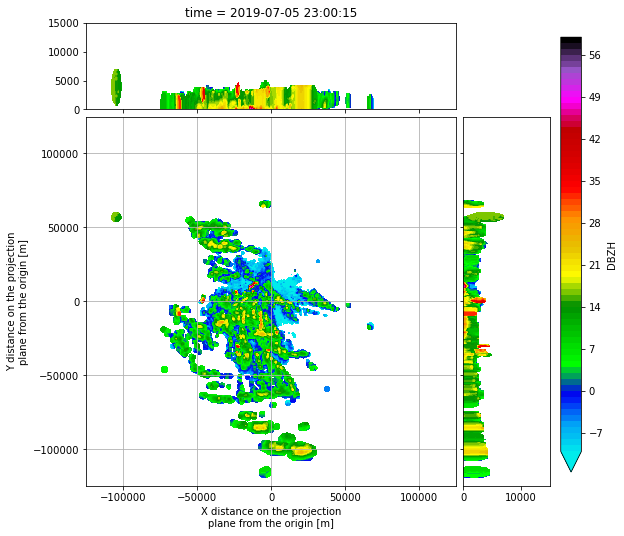

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect(1.)
xg['DBZH'][0].max(axis=0).plot.contourf(cmap='pyart_NWSRef',levels=range(-10,60),cbar_kwargs={'pad':0.02,'shrink':0.8},ax=ax)
ax.grid()
ax.set_title(None)
# create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_x = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
ax_y = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)
# make some labels invisible
ax_x.xaxis.set_tick_params(labelbottom=False)
ax_y.yaxis.set_tick_params(labelleft=False)
xg['DBZH'][0].max(axis=1).plot.contourf(cmap='pyart_NWSRef',levels=range(-10,60),add_colorbar=False,ax=ax_x)
xg['DBZH'][0].max(axis=2).T.plot.contourf(cmap='pyart_NWSRef',levels=range(-10,60),
                                         add_colorbar=False,add_title=None,ax=ax_y,)
ax_y.set_title(None)
ax_y.set_xlabel(None);ax_y.set_ylabel(None);ax_x.set_xlabel(None);ax_x.set_ylabel(None)


Text(0, 0.5, '')

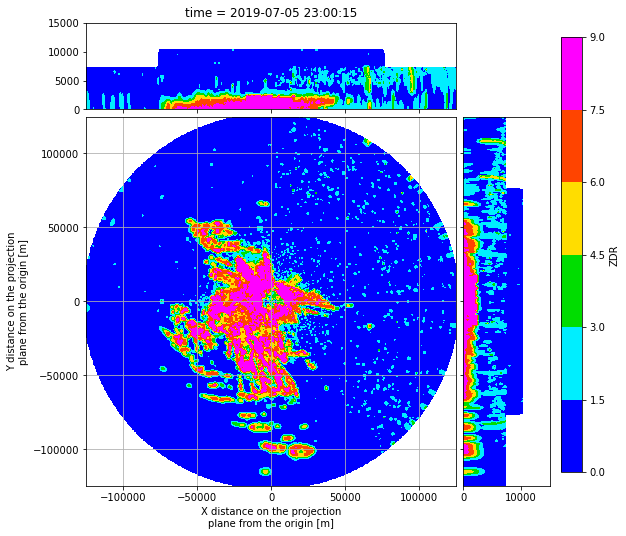

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect(1.)
xg['ZDR'][0].max(axis=0).plot.contourf(cmap='pyart_RefDiff',cbar_kwargs={'pad':0.02,'shrink':0.8},ax=ax)
ax.grid()
ax.set_title(None)
# create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_x = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
ax_y = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)
# make some labels invisible
ax_x.xaxis.set_tick_params(labelbottom=False)
ax_y.yaxis.set_tick_params(labelleft=False)
xg['ZDR'][0].max(axis=1).plot.contourf(cmap='pyart_RefDiff',add_colorbar=False,ax=ax_x)
xg['ZDR'][0].max(axis=2).T.plot.contourf(cmap='pyart_RefDiff',
                                         add_colorbar=False,add_title=None,ax=ax_y,)
ax_y.set_title(None)
ax_y.set_xlabel(None);ax_y.set_ylabel(None);ax_x.set_xlabel(None);ax_x.set_ylabel(None)
